# Lasso Analyses - Association Between gene Methylation and Weight outcomes

### Libraries

In [11]:
install.packages("tidyverse")

also installing the dependencies ‘sass’, ‘bslib’, ‘data.table’, ‘gargle’, ‘fs’, ‘rmarkdown’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘reprex’


Warning message in install.packages("tidyverse"):
“installation of package ‘data.table’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘fs’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘sass’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘gargle’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘dtplyr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘bslib’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘googledrive’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘rmarkd

In [1]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(MASS)
library(glmnet)
library(Matrix)



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2



In [10]:
install.packages("RcppEigen")

Warning message in install.packages("RcppEigen"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
install.packages("glmnet")

also installing the dependency ‘RcppEigen’


Warning message in install.packages("glmnet"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Import Phenotype data

#### Placenta

In [38]:
phenotypes_placenta <- read.csv(file = 'allpheno_placenta.csv',sep = '\t')
cwg_placenta=phenotypes_placenta['CWGsib']
BMI_placenta=phenotypes_placenta['BMI.kg.m.2._6mo']
GI_placenta=phenotypes_placenta['GI.kg.m._6mo']


#### CB

In [39]:
phenotypes_CB <- read.csv(file = 'allpheno_CB.csv',sep = '\t')
cwg_CB=phenotypes_CB['CWGsib']
BMI_CB=phenotypes_CB['BMI.kg.m.2._6mo']
GI_CB=phenotypes_CB['GI.kg.m._6mo']


## Association between Breastfeeding mode and infant weight outcome

In [3]:
brstdata <- read.csv(file = 'breastfeeding_samples_and_pheno.tsv',sep = '\t')


In [4]:
pheno = brstdata['std_GI_6mo']

In [5]:
head(brstdata)

,partID,std_BMI_6mo,std_GI_6mo,CWGsib_caller,cwgsibsign_caller,study_group,sWeight0,sHeight0,sWAPCT0,sWAZ0,⋯,birthwt,birthln,SPartID,Smomage,feedmodes34_80,feedmodes16_80,feedmodes28_80,sex,CWGsib_other,cwgsibsign_other
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,102,0.73958557,0.8134146,0.673507007,posit,Parenting,3.54,52.0,50.72731,0.01823198,⋯,3.54,52.0,S102,28.97534,brst,brst,form,1,0.673507007,posit
2,120,1.96277392,2.4693156,2.010516634,posit,Safety,4.43,53.3,96.73979,1.84385601,⋯,4.43,53.3,S120,37.18356,brst,brst,brst,1,2.010516634,posit
3,121,0.07731845,0.4212528,0.336507724,posit,Safety,3.69,53.3,61.88693,0.30251239,⋯,3.69,53.3,S121,32.02192,brst,brst,brst,1,0.336507724,posit
4,166,-0.84464745,-0.4464892,-0.580382570,minus,Safety,3.67,50.8,60.41306,0.26405329,⋯,3.67,50.8,S166,25.63562,form,form,form,1,-0.580382570,minus
5,200,-0.38155313,-0.1722636,-0.003342943,minus,Parenting,3.01,50.8,18.18391,-0.90837855,⋯,3.01,50.8,S200,27.83014,form,form,form,1,-0.003342943,minus
6,236,1.31599021,0.8575208,1.499368415,posit,Safety,3.25,47.0,30.71531,-0.50393632,⋯,3.25,47.0,S236,28.84384,form,form,form,1,1.499368415,posit


In [7]:
Xdata =  brstdata[141:144]

In [8]:
Xdata

Smomage,feedmodes34_80,feedmodes16_80,feedmodes28_80
<dbl>,<chr>,<chr>,<chr>
28.97534,brst,brst,form
37.18356,brst,brst,brst
32.02192,brst,brst,brst
25.63562,form,form,form
27.83014,form,form,form
28.84384,form,form,form
32.70137,brst,brst,brst
26.94795,brst,brst,form
31.64658,brst,brst,brst


In [9]:
Xdata[Xdata=="form"]<-0

In [10]:
Xdata[Xdata=="brst"]<-1

In [11]:
Xdata$Smomage <- as.numeric(Xdata$Smomage)
Xdata$feedmodes34_80 <- as.integer(Xdata$feedmodes34_80)
Xdata$feedmodes16_80 <- as.integer(Xdata$feedmodes16_80)

Xdata$feedmodes28_80 <- as.integer(Xdata$feedmodes28_80)


In [12]:
t(as.matrix(Xdata))

Smomage,28.97534,37.18356,32.02192,25.63562,27.83014,28.84384,32.70137,26.94795,31.64658,30.55068,⋯,34.00822,36.14521,41.02192,33.62466,31.67671,38.65205,39.39452,31.52877,37.46849,39.00822
feedmodes34_80,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,⋯,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000
feedmodes16_80,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,⋯,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000
feedmodes28_80,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,⋯,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000


In [13]:
t(as.matrix(pheno))

std_GI_6mo,0.8134146,2.469316,0.4212528,-0.4464892,-0.1722636,0.8575208,0.1642861,-1.054388,-0.2930763,-0.03035659,⋯,-0.3141438,-0.2286485,0.7443249,-1.11148,0.02504939,-0.1347896,-0.1663857,-1.454391,0.2434341,0.547314


In [14]:
cv.lasso_brstdata = cv.glmnet(x=as.matrix(Xdata),y=as.matrix(pheno),nfolds=10,intercept=TRUE,alpha=1,nlambda=300)


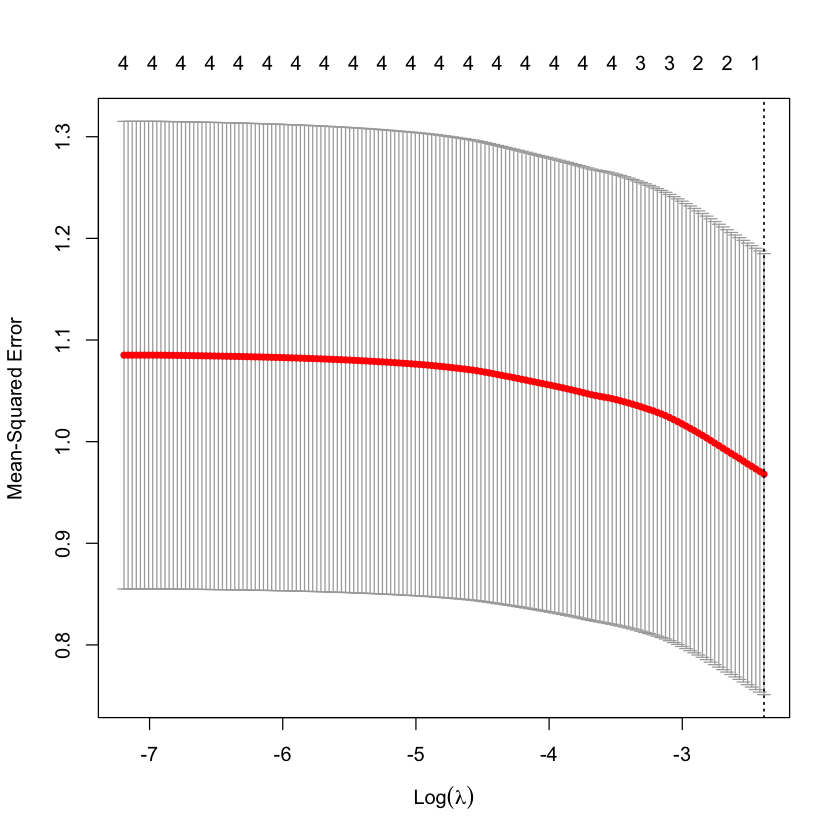

In [15]:
plot(cv.lasso_brstdata)
Beta.opt_brstdata = coef(cv.lasso_brstdata,s=cv.lasso_brstdata$lambda.min)


In [16]:
Beta.opt_brstdata

5 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)    0.006098945
Smomage        .          
feedmodes34_80 .          
feedmodes16_80 .          
feedmodes28_80 .          

In [17]:
Xdata[which(Beta.opt_brstdata[-1] !=0),]

Smomage,feedmodes34_80,feedmodes16_80,feedmodes28_80
<dbl>,<int>,<int>,<int>


## Association between other maternal covariates and infant weight outcome

In [40]:
cov_placenta <- read.csv(file = 'cov_placenta.csv',sep = '\t')
cov_CB <- read.csv(file = 'cov_CB.csv',sep = '\t')


In [41]:
head(cov_placenta)

,X,PartID,delivery,gest_weeks,GestDiabetes,smoke,smoke_tri_1,smoke_tri_2,smoke_tri_3,illness_yn,illness,meds_yn,meds,Smomage
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>
1,0,102,0,39,0,0,0,0,0,0,NA,1,,28.97534
2,1,103,0,37,0,0,0,0,0,0,NA,1,,24.64384
3,8,118,1,39,0,0,0,0,0,0,NA,1,,38.66849
4,9,120,1,39,0,0,0,0,0,0,NA,1,,37.18356
5,14,131,1,39,0,0,0,0,0,0,NA,0,,35.48493
6,23,150,1,39,0,0,0,0,0,0,NA,1,,34.70685


In [42]:
as.matrix(cov_placenta[3:10])

delivery,gest_weeks,GestDiabetes,smoke,smoke_tri_1,smoke_tri_2,smoke_tri_3,illness_yn
0,39,0,0,0,0,0,0
0,37,0,0,0,0,0,0
1,39,0,0,0,0,0,0
1,39,0,0,0,0,0,0
1,39,0,0,0,0,0,0
1,39,0,0,0,0,0,0
NA,39,0,1,1,1,1,0
0,39,0,0,0,0,0,0
0,40,0,0,0,0,0,0
0,39,0,0,0,0,0,0


In [43]:
cov_placenta[is.na(cov_placenta)] <- 0

In [44]:
newdata <- cov_placenta[c(3:6,12,14)]



In [45]:
newdata

delivery,gest_weeks,GestDiabetes,smoke,meds_yn,Smomage
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
0,39,0,0,1,28.97534
0,37,0,0,1,24.64384
1,39,0,0,1,38.66849
1,39,0,0,1,37.18356
1,39,0,0,0,35.48493
1,39,0,0,1,34.70685
0,39,0,1,0,28.13699
0,39,0,0,0,28.29315
0,40,0,0,1,24.49589


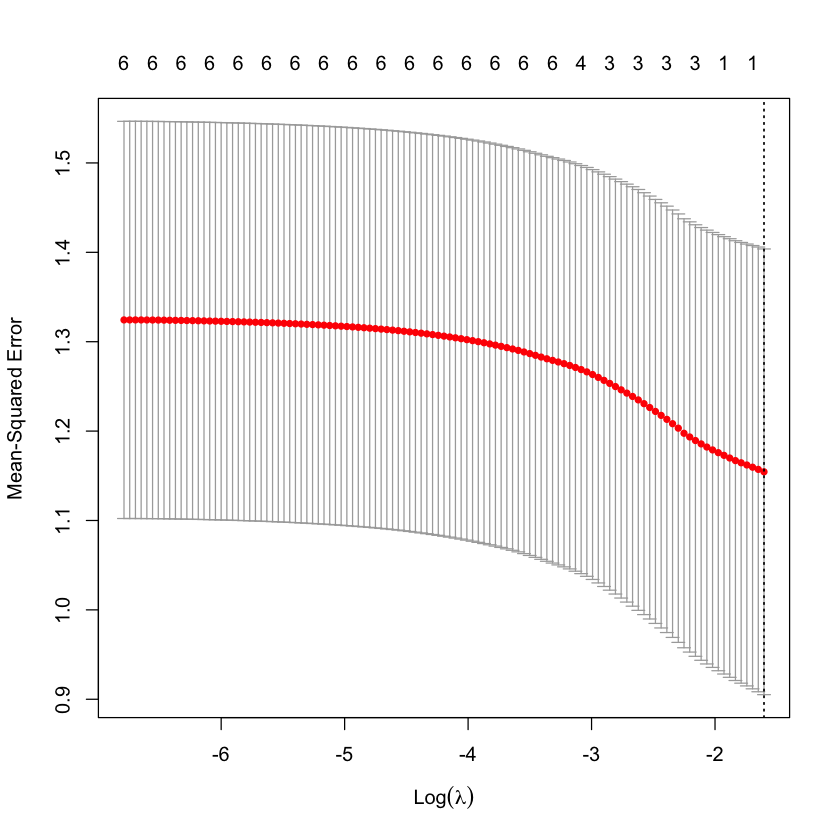

In [46]:
cv.lasso_covplacenta = cv.glmnet(x=as.matrix(as.matrix(newdata)),y=as.matrix(cwg_placenta),nfolds=10,intercept=TRUE,alpha=1,nlambda=200)
plot(cv.lasso_covplacenta)
Beta.opt_covplacenta = coef(cv.lasso_covplacenta,s=cv.lasso_covplacenta$lambda.min)


In [52]:
cov_CB[is.na(cov_CB)] <- 0
newdata <- cov_CB[c(3:6,12,14)]
newdata

delivery,gest_weeks,GestDiabetes,smoke,meds_yn,Smomage
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
0,39,0,0,1,28.97534
0,37,0,0,1,24.64384
1,39,0,0,1,38.66849
1,39,0,0,1,37.18356
0,40,0,0,1,32.02192
1,39,0,0,0,35.48493
1,39,0,0,1,34.70685
0,39,0,1,0,28.13699
0,39,0,0,0,28.29315


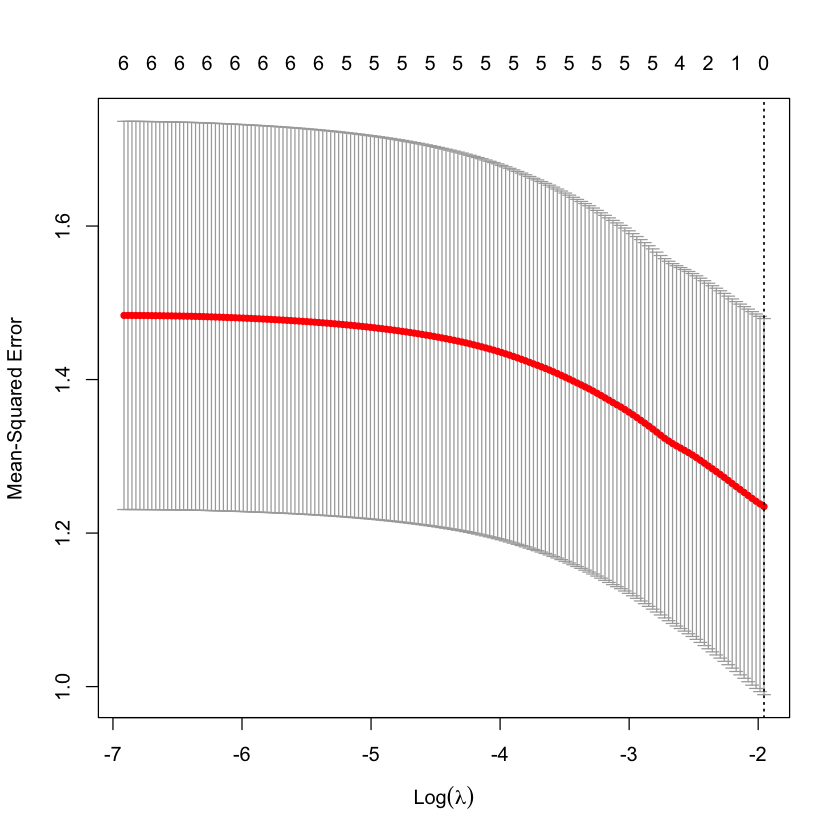

In [54]:
cv.lasso_GI_CB = cv.glmnet(x=as.matrix(newdata),y=as.matrix(GI_CB),nfolds=10,intercept=TRUE,alpha=1,nlambda=300)
plot(cv.lasso_GI_CB)
Beta.opt_GI_CB = coef(cv.lasso_GI_CB,s=cv.lasso_GI_CB$lambda.min)


## Association between Gene methylation state and Weight outcomes

## CWG

### Placenta

In [7]:
placenta_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_placenta.csv',sep = '\t')
features_placenta=placenta_gene_methylations[9:55]
Xdata_placenta=t(features_placenta)

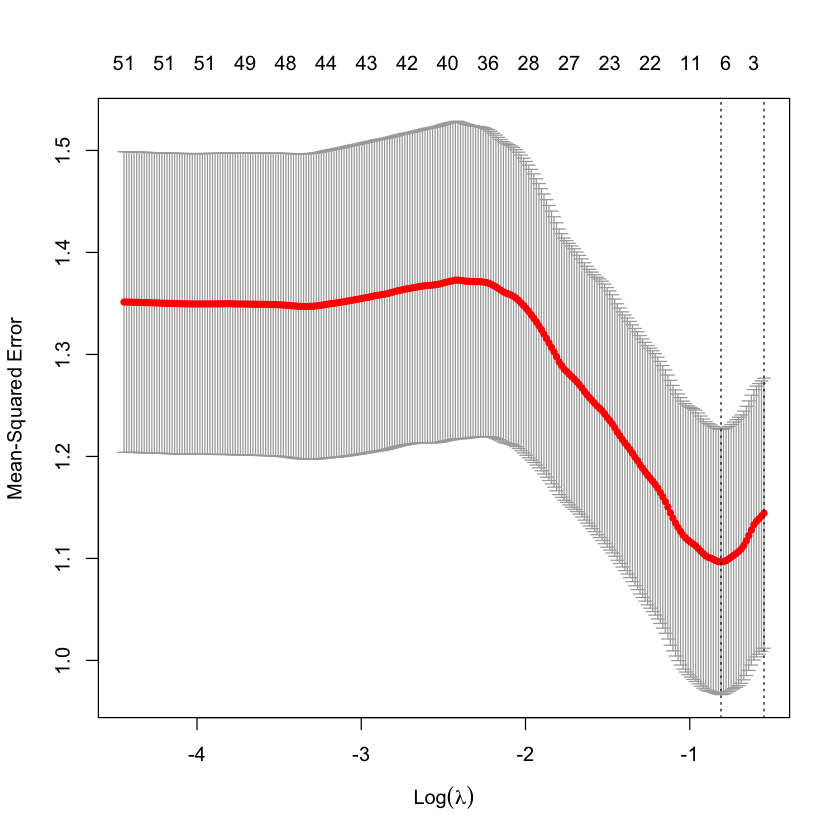

In [8]:
cv.lasso_cwg_placenta = cv.glmnet(x=as.matrix(Xdata_placenta),y=as.matrix(cwg_placenta),nfolds=10,intercept=TRUE,alpha=1,nlambda=300)
plot(cv.lasso_cwg_placenta)
Beta.opt_cwg_placenta = coef(cv.lasso_cwg_placenta,s=cv.lasso_cwg_placenta$lambda.min)


In [9]:
res_cwg_placenta=placenta_gene_methylations[which(Beta.opt_cwg_placenta[-1] !=0),]

In [10]:
which(Beta.opt_cwg_placenta[-1] !=0)

[1]  5565  6160 10030 10081 11267 17282

In [11]:
res_cwg_placenta[,0]

5565
6160
10030
10081
11267
17282


In [12]:
corlist=c()

for(i in 1:length(which(Beta.opt_cwg_placenta[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  correlation=cor(cwg_placenta[,1],t(res_cwg_placenta[i,9:55])[,1])
  print(correlation)
  corlist=append(corlist,correlation)
}
res_cwg_placenta['coefcor']=corlist


[1] 0.5454636
[1] -0.5380441
[1] -0.5579853
[1] 0.5011598
[1] -0.5170309
[1] -0.5567579


In [13]:
list_lm=c()
list_pval=c()
for(i in 1:length(which(Beta.opt_cwg_placenta[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(cwg_placenta[,1] ~ t(res_cwg_placenta[i,9:55])[,1] )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_cwg_placenta['coeflm']=list_lm
res_cwg_placenta['pvalue']=list_pval


In [15]:
res_cwg_placenta[58]

,pvalue
,<dbl>
5565,7.338502e-05
6160,9.594992e-05
10030,4.600120e-05
10081,3.329840e-04
11267,1.983641e-04
17282,4.819629e-05


In [16]:
cbind(res_cwg_placenta[2],res_cwg_placenta[56:58])

,Name,coefcor,coeflm,pvalue
,<fct>,<dbl>,<dbl>,<dbl>
5565,gene-ADGRB2,0.5454636,12.945229,7.338502e-05
6160,gene-LOC107985032,-0.5380441,-7.283328,9.594992e-05
10030,gene-BTBD18,-0.5579853,-9.105960,4.600120e-05
10081,gene-OR4D1,0.5011598,12.180996,3.329840e-04
11267,gene-ACTN1,-0.5170309,-27.376902,1.983641e-04
17282,gene-TAS2R38,-0.5567579,-6.554041,4.819629e-05


In [18]:
write.table(cbind(res_cwg_placenta[2],res_cwg_placenta[56:58]), file='res_cwg_placenta_correlation.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


In [17]:
list_lm=c()
list_pval=c()
for(i in 1:11) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(cwg_placenta[,1] ~ t(res_cwg_placenta[i,9:55])[,1] )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_cwg_placenta['coeflm']=list_lm
res_cwg_placenta['pvalue']=list_pval


cbind(res_cwg_placenta[2],res_cwg_placenta[56:57])


ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [255]:
write.table(cbind(res_cwg_placenta[0:8],res_cwg_placenta[56:57]), file='res_cwg_placenta.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


### Cord Blood

In [19]:
CB_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_latest.csv',sep = '\t')
features_CB=CB_gene_methylations[9:56]
Xdata_CB=t(features_CB)


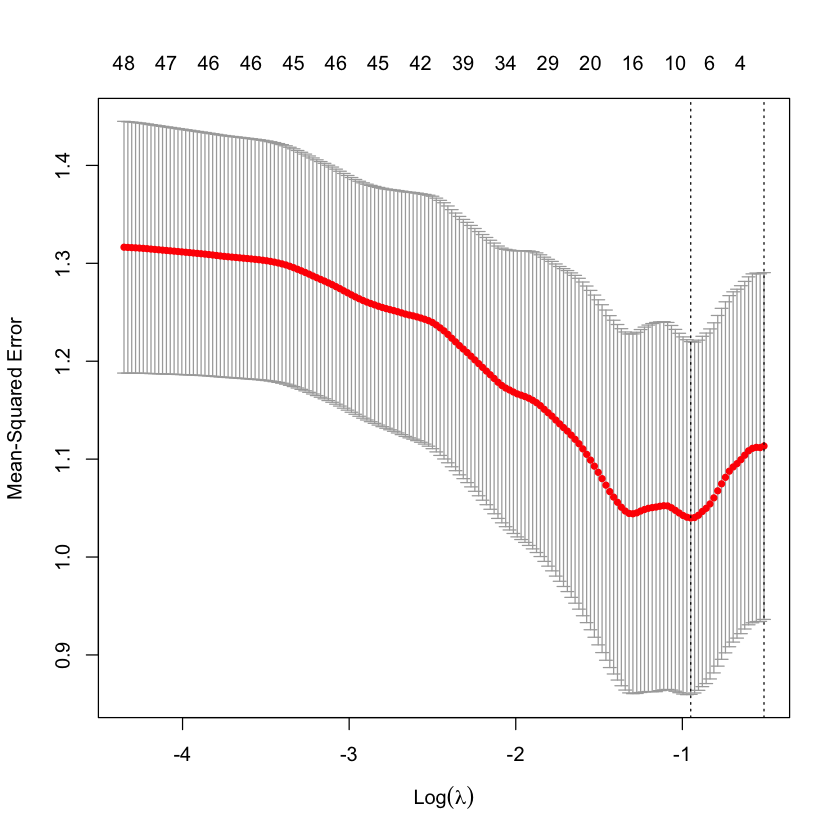

In [20]:
cv.lasso_cwg_CB = cv.glmnet(x=as.matrix(Xdata_CB),y=as.matrix(cwg_CB),nfolds=10,intercept=TRUE,alpha=1,nlambda=200)
plot(cv.lasso_cwg_CB)
Beta.opt_cwg_CB = coef(cv.lasso_cwg_CB,s=cv.lasso_cwg_CB$lambda.min)


In [21]:
res_cwg_CB=CB_gene_methylations[which(Beta.opt_cwg_CB[-1] !=0),]
res_cwg_CB[0:8]

,X,Name,ID,start,end,Chr,type,function.
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1321,0,gene-PLIN4,GeneID:729359,4502192,4520285,chr19,gene,perilipin 4
3918,0,gene-ANKS4B,GeneID:257629,21233699,21253850,chr16,gene,ankyrin repeat and sterile alpha motif domain containing 4B
6774,0,gene-PPP1R16B,GeneID:26051,38805694,38923024,chr2,gene,protein phosphatase 1 regulatory subunit 16B
17069,0,gene-CCDC28A-AS1,GeneID:100507462,138725215,138773703,chr6,gene,CCDC28A antisense RNA 1
18973,0,gene-LAMP3,GeneID:27074,183122215,183162761,chr3,gene,lysosomal associated membrane protein 3
19967,0,gene-UBE2F,GeneID:140739,237966945,238042782,chr2,gene,ubiquitin conjugating enzyme E2 F %28putative%29


In [22]:

for(i in 1:length(which(Beta.opt_cwg_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  correlation=cor(cwg_CB[,1],t(res_cwg_CB[i,9:56])[,1])
  print(correlation)
}

[1] 0.5838331
[1] -0.5193207
[1] -0.5777032
[1] 0.5849738
[1] 0.536751
[1] 0.5632546


In [29]:
list_lm=c()
list_pval=c()
for(i in 1:length(which(Beta.opt_cwg_CB[-1] !=0))) {
  lm <- lm(cwg_CB[,1] ~ t(res_cwg_CB[i,9:56])[,1] )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_cwg_CB['coeflm']=list_lm
res_cwg_CB['pvalue']=list_pval


In [35]:
corlist=c()

for(i in 1:length(which(Beta.opt_cwg_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  correlation=cor(cwg_CB[,1],t(res_cwg_CB[i,9:56])[,1])
  print(correlation)
  corlist=append(corlist,correlation)
}
res_cwg_CB['coefcor']=corlist

[1] 0.5838331
[1] -0.5193207
[1] -0.5777032
[1] 0.5849738
[1] 0.536751
[1] 0.5632546


In [38]:
cbind(res_cwg_CB[2],res_cwg_CB[58:60])

,Name,coeflm,pvalue,coefcor
,<fct>,<dbl>,<dbl>,<dbl>
1321,gene-PLIN4,45.44944,1.325314e-05,0.5838331
3918,gene-ANKS4B,-27.62346,1.554316e-04,-0.5193207
6774,gene-PPP1R16B,-71.25159,1.712945e-05,-0.5777032
17069,gene-CCDC28A-AS1,76.86403,1.262793e-05,0.5849738
18973,gene-LAMP3,118.28831,8.393371e-05,0.5367510
19967,gene-UBE2F,93.29920,3.074022e-05,0.5632546


In [39]:
write.table(cbind(res_cwg_CB[2],res_cwg_CB[58:60]), file='res_cwg_CB_correlation.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


In [256]:
write.table(cbind(res_cwg_CB[0:8],res_cwg_CB[58:59]), file='res_cwg_CB.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


## BMI

### Placenta

In [65]:
placenta_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_placenta.csv',sep = '\t')
features_placenta=placenta_gene_methylations[9:55]
Xdata_placenta=t(features_placenta)

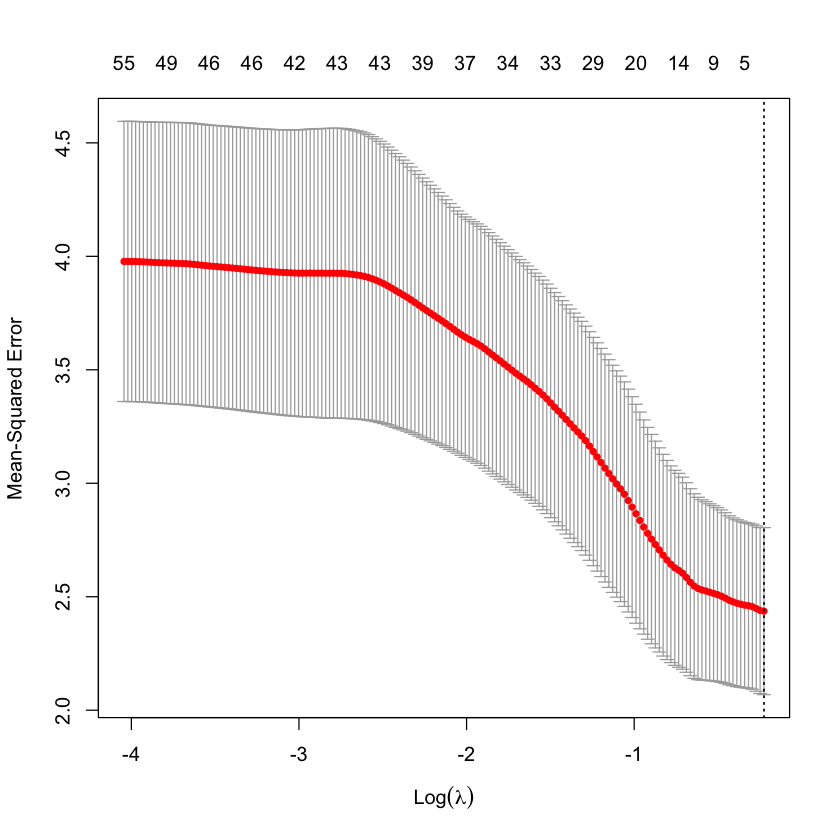

In [68]:
cv.lasso_BMI_placenta = cv.glmnet(x=as.matrix(Xdata_placenta),y=as.matrix(BMI_placenta),nfolds=10,intercept=TRUE,alpha=1,nlambda=200)
plot(cv.lasso_BMI_placenta)
Beta.opt_BMI_placenta = coef(cv.lasso_BMI_placenta,s=cv.lasso_BMI_placenta$lambda.min)


In [69]:
res_BMI_placenta=placenta_gene_methylations[which(Beta.opt_BMI_placenta[-1] !=0),]

In [70]:
res_BMI_placenta[0:8]

X,Name,ID,start,end,Chr,type,function.
<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>


In [ ]:
res_BMI_placenta[0:8]

,X,Name,ID,start,end,Chr,type,function.
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
4598,0,gene-TRIM63,GeneID:84676,26051304,26067634,chr1,gene,tripartite motif containing 63
5565,0,gene-ADGRB2,GeneID:576,31727105,31764340,chr1,gene,adhesion G protein-coupled receptor B2
5730,0,gene-ARHGAP11A-SCG5,GeneID:114118903,32615476,32697098,chr15,gene,ARHGAP11A-SCG5 readthrough
10030,0,gene-BTBD18,GeneID:643376,57743514,57753176,chr11,gene,BTB domain containing 18
11267,0,gene-ACTN1,GeneID:87,68874123,68979366,chr14,gene,actinin alpha 1
12673,0,gene-SSBP2,GeneID:23635,81412807,81751253,chr5,gene,single stranded DNA binding protein 2
18017,0,gene-SSR2,GeneID:6746,156009048,156020951,chr1,gene,signal sequence receptor subunit 2
19602,0,gene-LINC01921,GeneID:101928327,216870772,216871639,chr2,gene,long intergenic non-protein coding RNA 1921


In [ ]:
write.table(res_BMI_placenta[0:8], file='res_BMI_placenta.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


### Cord Blood

In [43]:
CB_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_latest.csv',sep = '\t')
features_CB=CB_gene_methylations[9:56]
Xdata_CB=t(features_CB)


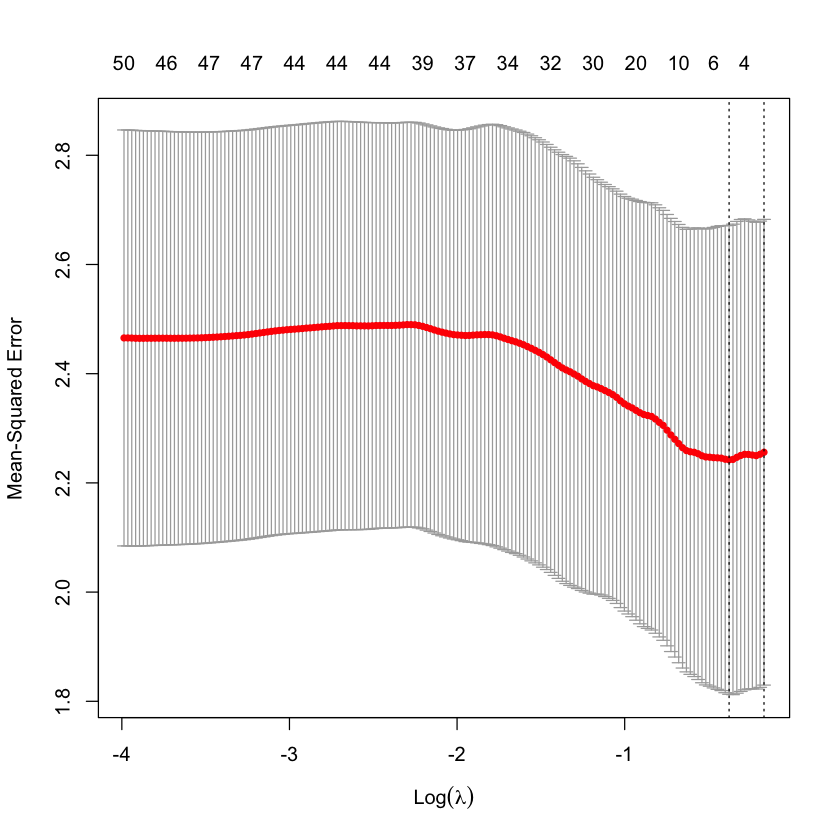

In [44]:
cv.lasso_BMI_CB = cv.glmnet(x=as.matrix(Xdata_CB),y=as.matrix(BMI_CB),nfolds=10,intercept=TRUE,alpha=1,nlambda=200)
plot(cv.lasso_BMI_CB)
Beta.opt_BMI_CB = coef(cv.lasso_BMI_CB,s=cv.lasso_BMI_CB$lambda.min)


In [45]:
res_BMI_CB=CB_gene_methylations[which(Beta.opt_BMI_CB[-1] !=0),]
res_BMI_CB[0:8]

,X,Name,ID,start,end,Chr,type,function.
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1321,0,gene-PLIN4,GeneID:729359,4502192,4520285,chr19,gene,perilipin 4
6774,0,gene-PPP1R16B,GeneID:26051,38805694,38923024,chr2,gene,protein phosphatase 1 regulatory subunit 16B
18744,0,gene-HRH2,GeneID:3274,175657762,175710756,chr5,gene,histamine receptor H2
19967,0,gene-UBE2F,GeneID:140739,237966945,238042782,chr2,gene,ubiquitin conjugating enzyme E2 F %28putative%29


In [46]:
list_lm=c()
list_pval=c()
for(i in 1:length(which(Beta.opt_BMI_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(BMI_CB[,1] ~ t(res_BMI_CB[i,9:56])[,1]  )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_BMI_CB['coeflm']=list_lm
res_BMI_CB['pvalue']=list_pval

cbind(res_BMI_CB[2],res_BMI_CB[58:59])

,Name,coeflm,pvalue
,<fct>,<dbl>,<dbl>
1321,gene-PLIN4,64.05352,2.408854e-05
6774,gene-PPP1R16B,-98.26926,4.881017e-05
18744,gene-HRH2,54.75834,6.584309e-05
19967,gene-UBE2F,133.19242,4.017855e-05


In [47]:
corlist=c()

for(i in 1:length(which(Beta.opt_BMI_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  correlation=cor(BMI_CB[,1],t(res_BMI_CB[i,9:56])[,1])
  print(correlation)
  corlist=append(corlist,correlation)
}
res_BMI_CB['coefcor']=corlist

[1] 0.5693621
[1] -0.5513322
[1] 0.5433641
[1] 0.556406


In [48]:
cbind(res_BMI_CB[2],res_BMI_CB[58:60])

,Name,coeflm,pvalue,coefcor
,<fct>,<dbl>,<dbl>,<dbl>
1321,gene-PLIN4,64.05352,2.408854e-05,0.5693621
6774,gene-PPP1R16B,-98.26926,4.881017e-05,-0.5513322
18744,gene-HRH2,54.75834,6.584309e-05,0.5433641
19967,gene-UBE2F,133.19242,4.017855e-05,0.5564060


In [49]:
write.table(cbind(res_BMI_CB[2],res_BMI_CB[58:60]), file='res_BMI_CB_correlation.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


In [257]:
write.table(cbind(res_BMI_CB[0:8],res_BMI_CB[58:59]), file='res_BMI_CB.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


## GI

### Placenta

In [48]:
placenta_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_placenta.csv',sep = '\t')
features_placenta=placenta_gene_methylations[9:55]
Xdata_placenta=t(features_placenta)

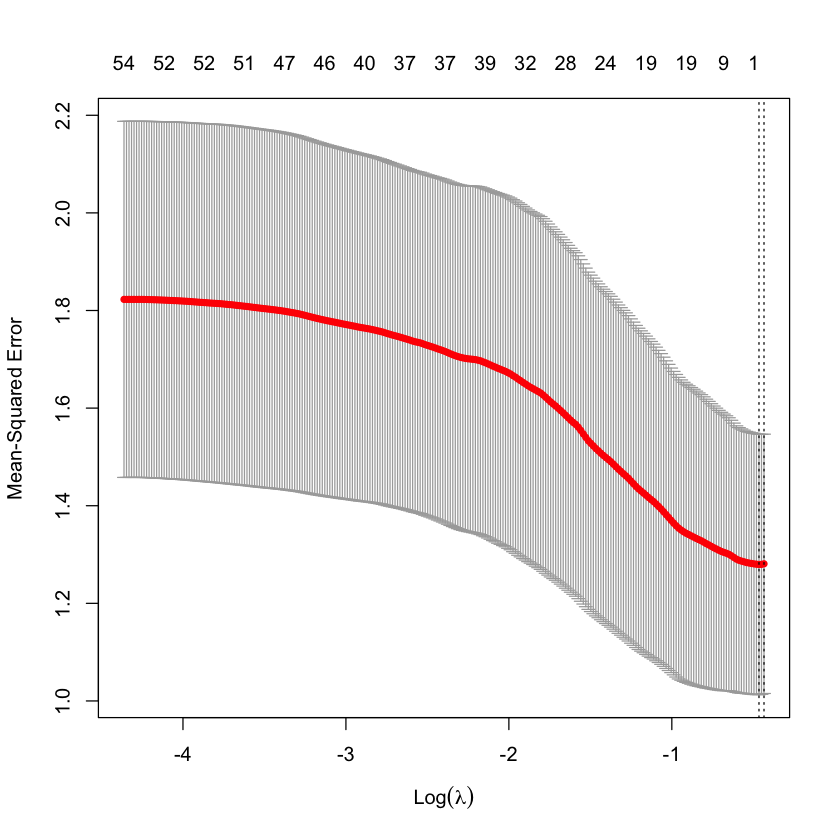

In [50]:
cv.lasso_GI_placenta = cv.glmnet(x=as.matrix(Xdata_placenta),y=as.matrix(GI_placenta),nfolds=10,intercept=TRUE,alpha=1,nlambda=300)
plot(cv.lasso_GI_placenta)
Beta.opt_GI_placenta = coef(cv.lasso_GI_placenta,s=cv.lasso_GI_placenta$lambda.min)


In [ ]:
res_GI_placenta=placenta_gene_methylations[which(Beta.opt_GI_placenta[-1] !=0),]

In [ ]:
res_GI_placenta[0:8]

X,Name,ID,start,end,Chr,type,function.
<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>


In [ ]:
write.table(res_GI_placenta[0:8], file='res_GI_placenta.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


### Cord Blood

In [64]:
CB_gene_methylations <- read.csv(file = 'genes_meth_nonnagenes_latest.csv',sep = '\t')
features_CB=CB_gene_methylations[9:56]
Xdata_CB=t(features_CB)


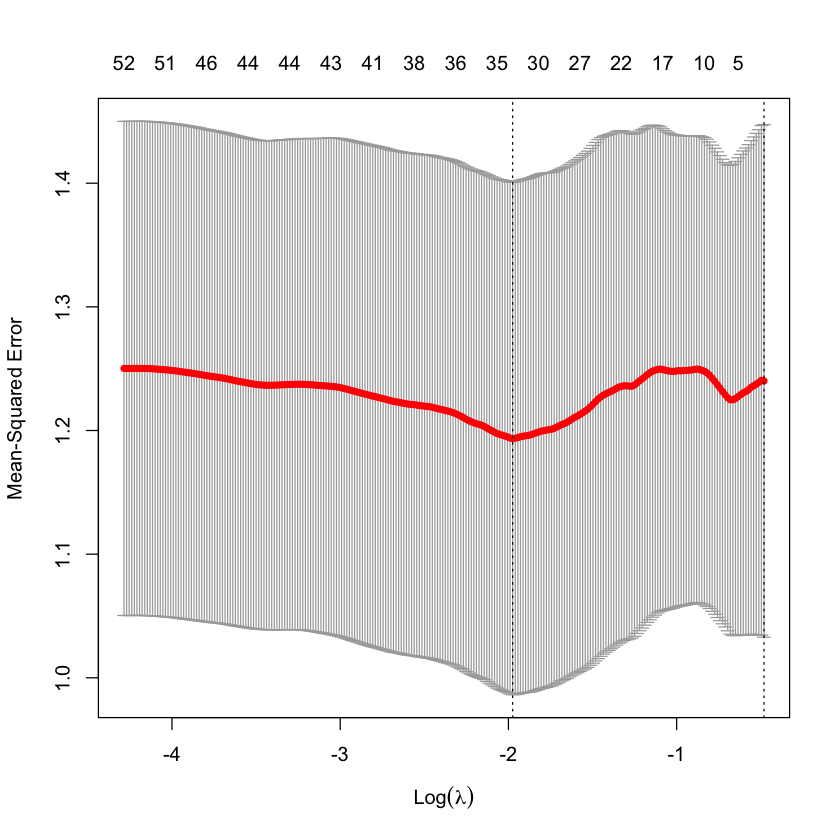

In [65]:
cv.lasso_GI_CB = cv.glmnet(x=as.matrix(Xdata_CB),y=as.matrix(GI_CB),nfolds=10,intercept=TRUE,alpha=1,nlambda=300)
plot(cv.lasso_GI_CB)
Beta.opt_GI_CB = coef(cv.lasso_GI_CB,s=cv.lasso_GI_CB$lambda.min)


In [66]:
res_GI_CB=CB_gene_methylations[which(Beta.opt_GI_CB[-1] !=0),]
res_GI_CB[0:8]

,X,Name,ID,start,end,Chr,type,function.
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1160,0,gene-DNASE1,GeneID:1773,3611737,3665472,chr16,gene,deoxyribonuclease 1
1321,0,gene-PLIN4,GeneID:729359,4502192,4520285,chr19,gene,perilipin 4
1805,0,gene-LOC100129931,GeneID:100129931,7030554,7046231,chr4,gene,uncharacterized LOC100129931
3004,0,gene-ERP27,GeneID:121506,14914027,14938537,chr12,gene,endoplasmic reticulum protein 27
4220,0,gene-GZF1,GeneID:64412,23361585,23375399,chr2,gene,GDNF inducible zinc finger protein 1
4575,0,gene-SMIM20,GeneID:389203,25914192,25929879,chr4,gene,small integral membrane protein 20
5554,0,gene-ABHD16A,GeneID:7920,31686955,31703324,chr6,gene,abhydrolase domain containing 16A
5748,0,gene-YARS2,GeneID:51067,32725247,32756458,chr12,gene,tyrosyl-tRNA synthetase 2
5763,0,gene-LINC00486,GeneID:285045,32825433,32946136,chr2,gene,long intergenic non-protein coding RNA 486


In [70]:
list_lm=c()
list_pval=c()
for(i in 1:length(which(Beta.opt_GI_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(GI_CB[,1] ~ t(res_GI_CB[i,9:56])[,1]  )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_GI_CB['coeflm']=list_lm
res_GI_CB['pvalue']=list_pval

cbind(res_GI_CB[2],res_GI_CB[58:59])

,Name,coeflm,pvalue
,<fct>,<dbl>,<dbl>
1160,gene-DNASE1,65.46195,7.460323e-03
1321,gene-PLIN4,39.42395,5.757128e-04
1805,gene-LOC100129931,-70.10214,6.008900e-03
3004,gene-ERP27,56.14111,1.363081e-03
4220,gene-GZF1,-11.05906,3.013982e-04
4575,gene-SMIM20,96.03847,2.760027e-03
5554,gene-ABHD16A,98.10876,1.779307e-04
5748,gene-YARS2,-14.27464,4.897781e-04
5763,gene-LINC00486,-94.80926,1.179606e-03


In [68]:
list_lm=c()
list_pval=c()
for(i in 1:31) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(GI_CB[,1] ~ t(res_GI_CB[i,9:57])[,1] )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_GI_CB['coeflm']=list_lm
res_GI_CB['pvalue']=list_pval



ERROR: Error in model.frame.default(formula = GI_CB[, 1] ~ t(res_GI_CB[i, 9:57])[, : variable lengths differ (found for 't(res_GI_CB[i, 9:57])[, 1]')


In [71]:
list_lm=c()
list_pval=c()
for(i in 1:length(which(Beta.opt_GI_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  lm <- lm(GI_CB[,1] ~ t(res_GI_CB[i,9:56])[,1]  )
  list_lm=append(list_lm,lm$coefficients[2])
  list_pval=append(list_pval,summary(lm)$coefficients[,4][2])
}
res_GI_CB['coeflm']=list_lm
res_GI_CB['pvalue']=list_pval

cbind(res_GI_CB[2],res_GI_CB[58:59])

,Name,coeflm,pvalue
,<fct>,<dbl>,<dbl>
1160,gene-DNASE1,65.46195,7.460323e-03
1321,gene-PLIN4,39.42395,5.757128e-04
1805,gene-LOC100129931,-70.10214,6.008900e-03
3004,gene-ERP27,56.14111,1.363081e-03
4220,gene-GZF1,-11.05906,3.013982e-04
4575,gene-SMIM20,96.03847,2.760027e-03
5554,gene-ABHD16A,98.10876,1.779307e-04
5748,gene-YARS2,-14.27464,4.897781e-04
5763,gene-LINC00486,-94.80926,1.179606e-03


In [72]:
corlist=c()

for(i in 1:length(which(Beta.opt_GI_CB[-1] !=0))) {
  # i-th element of `u1` squared into `i`-th position of `usq`
  correlation=cor(GI_CB[,1],t(res_GI_CB[i,9:56])[,1])
  print(correlation)
  corlist=append(corlist,correlation)
}
res_GI_CB['coefcor']=corlist

[1] 0.3815142
[1] 0.4788284
[1] -0.3909271
[1] 0.4491597
[1] -0.499471
[1] 0.4227311
[1] 0.5153663
[1] -0.4841078
[1] -0.4543254
[1] 0.4353202
[1] 0.4817139
[1] -0.5391926
[1] 0.5355648
[1] 0.5694442
[1] -0.4861617
[1] 0.561127
[1] -0.4125102
[1] 0.3278557
[1] 0.5282401
[1] 0.4169529
[1] -0.4188007
[1] -0.4240653
[1] 0.3939565
[1] -0.4030148
[1] -0.5079787
[1] -0.4575115
[1] -0.46187
[1] -0.4083437
[1] -0.5171849
[1] -0.4223334
[1] 0.470564
[1] 0.4666672


In [73]:
cbind(res_GI_CB[2],res_GI_CB[58:60])[order(res_GI_CB$Name),]

,Name,coeflm,pvalue,coefcor
,<fct>,<dbl>,<dbl>,<dbl>
5554,gene-ABHD16A,98.10876,1.779307e-04,0.5153663
12778,gene-ABRAXAS1,-66.38634,4.509870e-03,-0.4030148
6991,gene-BMF,36.10559,8.762261e-05,0.5355648
17069,gene-CCDC28A-AS1,65.39519,7.376862e-04,0.4705640
12292,gene-CCNG2,14.56213,3.196853e-03,0.4169529
1160,gene-DNASE1,65.46195,7.460323e-03,0.3815142
3004,gene-ERP27,56.14111,1.363081e-03,0.4491597
16576,gene-FAM168B,-10.75393,2.788311e-03,-0.4223334
4220,gene-GZF1,-11.05906,3.013982e-04,-0.4994710


In [74]:
write.table(cbind(res_GI_CB[2],res_GI_CB[58:60])[order(res_GI_CB$Name),], file='res_GI_CB_correlation.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )


In [ ]:
Get correlation coefficient with cor(CWG,Gene) returns are called Rsquared

In [261]:
write.table(cbind(res_GI_CB[0:8],res_GI_CB[58:59]), file='res_GI_CB.tsv', quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE )
